# add image_id to generator output before running

In [1]:
import model

Using TensorFlow backend.


In [2]:
from config import Config
config=Config()

dataset = model.Dataset(config=config, 
                        path=r'/home/yang/Downloads/COCO-dataset',
                        subset='val2017')

loading annotations into memory...
Done (t=0.63s)
creating index...
index created!
num_of_classes: 81
Number of images: 14631
Number of classes: 81


In [3]:
gen = dataset.data_generator()

In [4]:
inputs, outputs = next(gen)

Feature map size: [256, 256], number of anchors: 49152
Feature map size: [128, 128], number of anchors: 12288
Feature map size: [64, 64], number of anchors: 3072
Feature map size: [32, 32], number of anchors: 768
Feature map size: [16, 16], number of anchors: 192
Total number of anchors:      65472


In [5]:
batch_image, batch_anchors_match, batch_anchors_delta_bbox = inputs
image_id = outputs[0]

In [6]:
batch_image.shape, batch_anchors_match.shape, batch_anchors_delta_bbox.shape

((1, 1024, 1024, 3), (1, 65472, 1), (1, 256, 4))

In [7]:
anchors = model.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES, 
                                   config.RPN_ANCHOR_RATIOS, 
                                   model.compute_backbone_shapes(config.IMAGE_SHAPE,
                                                          config), 
                                   config.BACKBONE_STRIDES, 
                                   config.RPN_ANCHOR_STRIDE)

Feature map size: [256, 256], number of anchors: 49152
Feature map size: [128, 128], number of anchors: 12288
Feature map size: [64, 64], number of anchors: 3072
Feature map size: [32, 32], number of anchors: 768
Feature map size: [16, 16], number of anchors: 192
Total number of anchors:      65472


In [8]:
import numpy as np

image = batch_image[0]
anchors_match = batch_anchors_match[0]
anchors_delta_bbox = batch_anchors_delta_bbox[0]

anchors_match_squeezed = np.squeeze(anchors_match, -1)
pos_ids = np.where(anchors_match_squeezed == 1)
pos_anchors = anchors[pos_ids]


In [9]:
anchors_delta_bbox[:len(pos_anchors)], anchors_delta_bbox.shape

(array([[-8.2080078e+01,  8.0798340e+00,  1.0644562e+00,  1.9850634e+00],
        [ 2.0136017e+02,  1.4239990e+02, -2.9831913e+00, -5.0834215e-01],
        [ 1.0752014e+02,  1.5343994e+02, -2.8236456e+00, -3.8273248e-01],
        [ 1.3216003e+02,  3.8943970e+02,  1.2503134e+00,  2.0705771e+00],
        [ 5.1519775e+01,  4.1927979e+02, -1.5425460e-01, -2.2990618e+00],
        [-3.0080017e+02,  3.4904007e+02,  1.0901479e+00,  1.0842818e+00],
        [-2.1719971e+02,  4.8096008e+02,  1.1955965e-01, -1.4530339e+00]],
       dtype=float32), (256, 4))

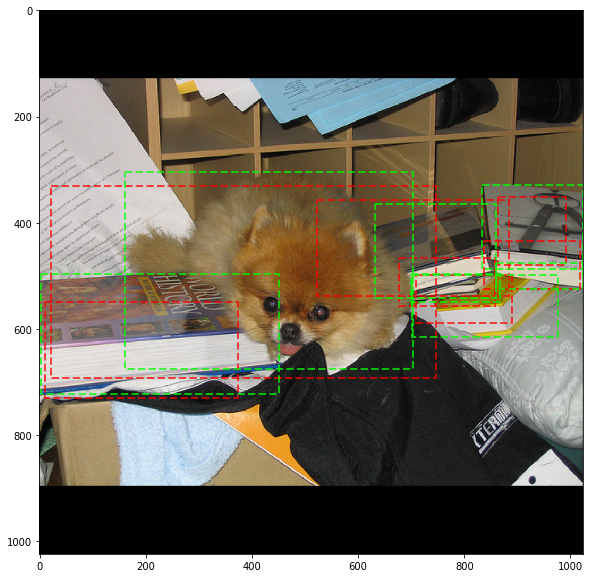

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as pathes

fig, ax = plt.subplots(1, figsize=(10,10))
for anch in pos_anchors:
    y1, x1, y2, x2 = anch
    p = pathes.Rectangle((x1, y1), x2-x1, y2-y1, 
                         linewidth=2,
                          alpha=0.7, 
                          linestyle="dashed",
                          edgecolor=[1,0,0], 
                          facecolor='none')
    ax.add_patch(p)
    
pos_anchors_molded = model.apply_deltas_to_boxes(pos_anchors, anchors_delta_bbox, config)
for anch in pos_anchors_molded:
    y1, x1, y2, x2 = anch
    p = pathes.Rectangle((x1, y1), x2-x1, y2-y1, 
                         linewidth=2,
                          alpha=0.7, 
                          linestyle="dashed",
                          edgecolor=[0,1,0], 
                          facecolor='none')
    ax.add_patch(p)
    
ax.imshow(image)
plt.show()

(480, 640, 3) <class 'numpy.ndarray'> 255
(1024, 1024, 3) <class 'numpy.ndarray'> 254
(480, 640, 7) <class 'numpy.ndarray'> True


/home/yang/.conda/envs/py3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/yang/.conda/envs/py3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(1024, 1024, 7) <class 'numpy.ndarray'> True


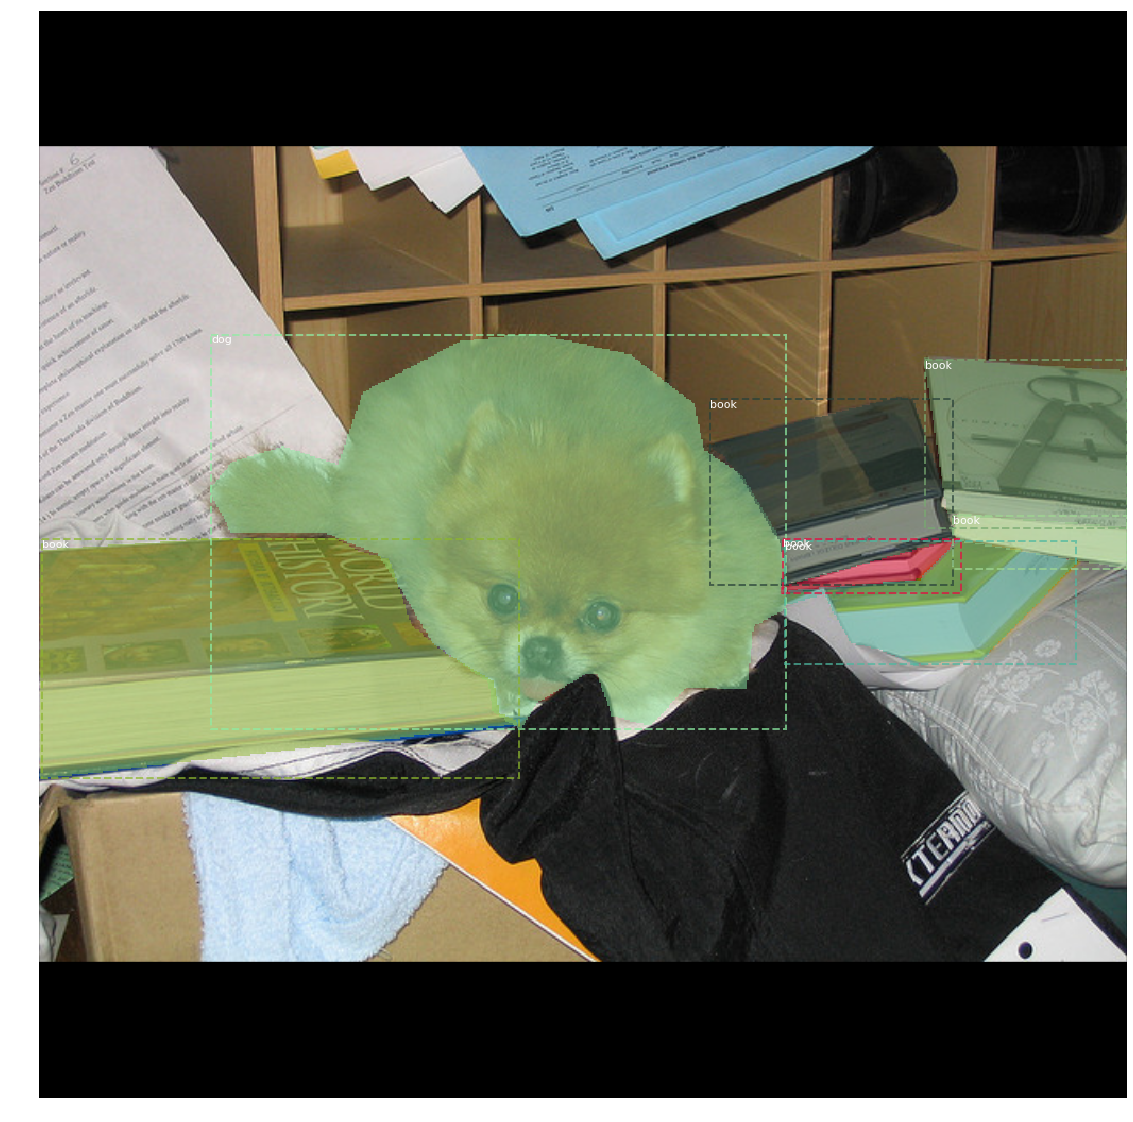

In [11]:
dataset.visulize(image_id)